# Análisis exploratorio.

## Nivel general de conversación

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, nltk, itertools
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
df = pd.read_csv('../preprocessing/tweets_preprocessed.csv', index_col=0)
df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,media,retweetedTweet,quotedTweet,mentionedUsers,coordinates,place,username,preprocessed_text,slang_data,punctuation
0,https://twitter.com/LaBandaPindonga/status/138...,2021-04-30 23:58:58+00:00,"Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...","Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...",1388281755816321026,"{'username': 'LaBandaPindonga', 'displayname':...",[],[],31,400,...,NaN,NaN,NaN,NaN,NaN,NaN,LaBandaPindonga,anoche dijo bobeli no tenemo vacuna po que lo ...,0,13
1,https://twitter.com/HenryChinaski67/status/138...,2021-04-30 23:31:29+00:00,Avanzan las negociaciones para producir íntegr...,Avanzan las negociaciones para producir íntegr...,1388274839417495553,"{'username': 'HenryChinaski67', 'displayname':...",[],[],19,157,...,NaN,NaN,NaN,NaN,NaN,NaN,HenryChinaski67,avanzan las negociaciones para producir integr...,0,0
2,https://twitter.com/ribaniez1/status/138827222...,2021-04-30 23:21:05+00:00,Castro al médico israelí:\nFue efectivo el con...,Castro al médico israelí:\nFue efectivo el con...,1388272223866265602,"{'username': 'ribaniez1', 'displayname': 'Raúl...",[],[],25,248,...,NaN,NaN,NaN,NaN,NaN,NaN,ribaniez1,castro al medico israeli fue efectivo el confi...,0,4
3,https://twitter.com/EcarleF/status/13882572630...,2021-04-30 22:21:38+00:00,El Laboratorio Richmond en Argentina va a fabr...,El Laboratorio Richmond en Argentina va a fabr...,1388257263085830144,"{'username': 'EcarleF', 'displayname': 'Soy Ed...",[],[],22,293,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,EcarleF,el laboratorio richmond en argentina va a fabr...,0,9
4,https://twitter.com/DrCKambourian/status/13882...,2021-04-30 22:03:41+00:00,Presidente/ Ministra: Dado que ayer estuvieron...,Presidente/ Ministra: Dado que ayer estuvieron...,1388252744176259074,"{'username': 'DrCKambourian', 'displayname': '...",[],[],228,2961,...,NaN,NaN,NaN,NaN,NaN,NaN,DrCKambourian,presidente ministra dado que ayer estuvieron g...,0,5


In [3]:
words = stopwords.words('spanish')
words.remove('no')
words.remove('ni')

stemmer = SnowballStemmer('spanish')
words = [stemmer.stem(word) for word in words]
words.extend( ['pregunta', 'exclamacion'] )

', '.join(words)

'de, la, que, el, en, y, a, los, del, se, las, por, un, par, con, una, su, al, lo, com, mas, per, sus, le, ya, o, este, si, porqu, esta, entre, cuand, muy, sin, sobr, tambien, me, hast, hay, dond, qui, desd, tod, nos, durant, tod, uno, les, contr, otros, ese, eso, ante, ellos, e, esto, mi, antes, algun, que, unos, yo, otro, otras, otra, el, tant, esa, estos, much, quien, nad, much, cual, poc, ella, estar, estas, algun, algo, nosotr, mi, mis, tu, te, ti, tu, tus, ellas, nosotr, vosotr, vosotr, os, mio, mia, mios, mias, tuy, tuy, tuy, tuy, suy, suy, suy, suy, nuestr, nuestr, nuestr, nuestr, vuestr, vuestr, vuestr, vuestr, esos, esas, estoy, estas, esta, estam, estais, estan, este, estes, estem, esteis, esten, estar, estaras, estar, estar, estar, estaran, estar, estar, estar, estar, estar, estab, estab, estab, estabais, estab, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estuv, estand, estad, estad, estad, estad, estad, he, has, 

In [4]:
tweets_tokens = df['preprocessed_text'].tolist()
tweets_tokens = [tweet_tokens.split() for tweet_tokens in tweets_tokens]
bag_of_words = [token for tweet_tokens in tweets_tokens for token in tweet_tokens if token not in words]
counter = nltk.FreqDist(bag_of_words)

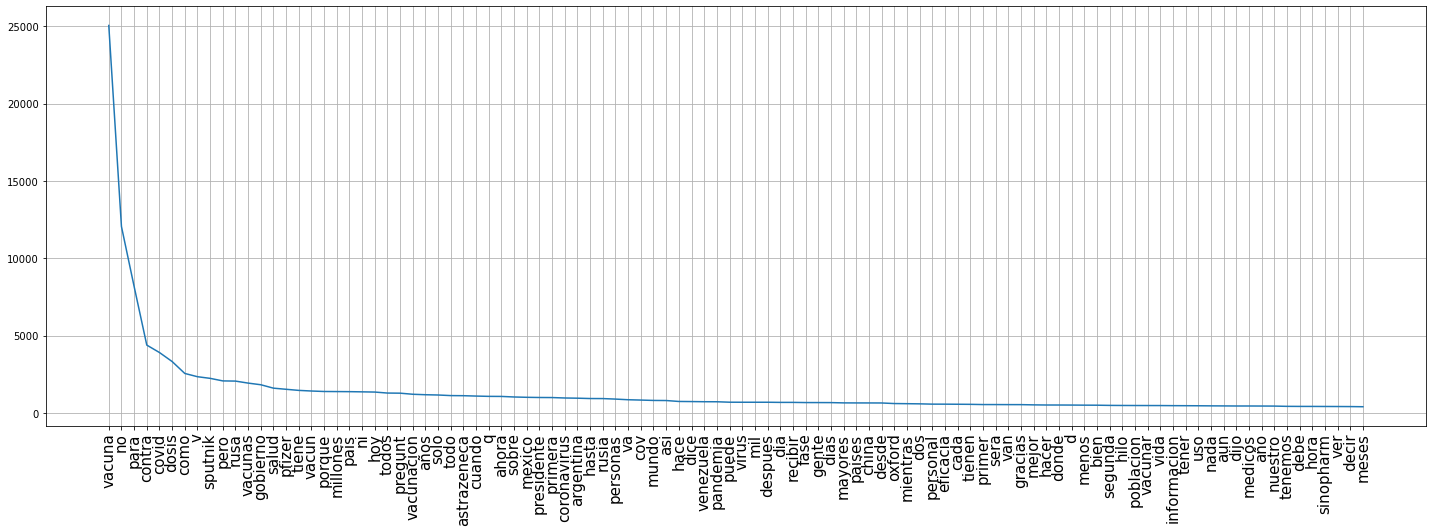

In [5]:
most_common = counter.most_common(100)
fig, ax = plt.subplots(figsize=(20,7.5), tight_layout=True)
ax.plot(*zip(*most_common))

ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.grid()

In [6]:
import itertools
bigrams_ = [nltk.bigrams(tweet_tokens) for tweet_tokens in tweets_tokens]
bigrams = list(itertools.chain(*bigrams_))

bigrams = [bigram for bigram in bigrams if not any(word in bigram for word in words)]

counter_bigrams = nltk.FreqDist(bigrams)

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128478 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9193 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/marti/.pyenv

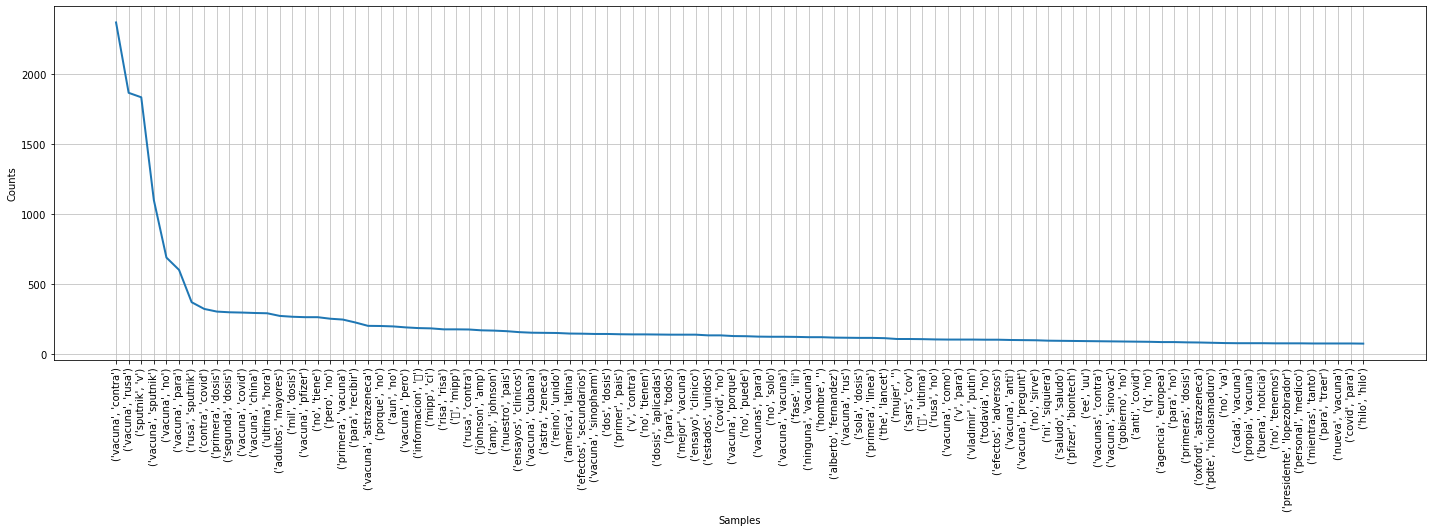

In [7]:
fig = plt.figure(figsize=(20,7.5), tight_layout=True)
ax = counter_bigrams.plot(100, cumulative=False)
ax.tick_params(labelsize=20, rotation=0)

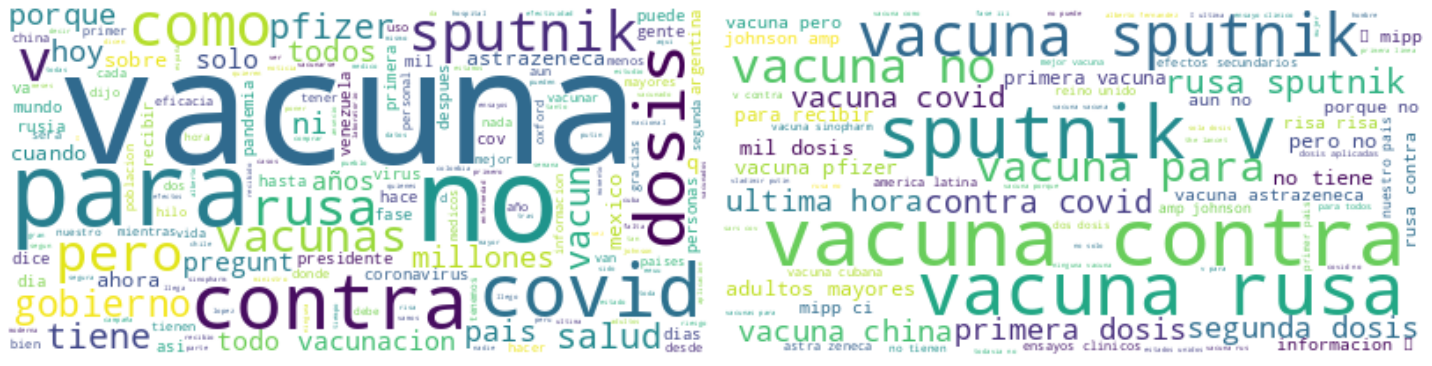

In [8]:
#counter.pop('pregunt', None)
#counter.pop('exclamacion', None)
#counter.pop('no', None)
wcloud = WordCloud(background_color='white').generate_from_frequencies(counter)
counter_bigrams_ = {}
for key, value in counter_bigrams.items(): counter_bigrams_[' '.join(key)] = value
#counter_bigrams_.pop('pregunt pregunt', None)
#counter_bigrams_.pop('exclamacion pregunt', None)
#counter_bigrams_.pop('exclamacion exclamacion', None)
wcloud_bigrams = WordCloud(background_color='white').generate_from_frequencies(counter_bigrams_)
fig, (ax0, ax1) = plt.subplots(1,2, tight_layout=True, figsize=(20,10))
ax0.imshow(wcloud, interpolation="bilinear")
ax1.imshow(wcloud_bigrams, interpolation="bilinear")
fig.tight_layout()
ax0.axis('off')
ax1.axis('off');
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', stopwords=STOPWORDS).generate(text)


## Tópicos

### LDA

https://stackoverflow.com/questions/54762690/what-is-the-meaning-of-coherence-score-0-4-is-it-good-or-bad

In [47]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel# spaCy for preprocessing
from gensim.test.utils import common_texts
from gensim import matutils
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis, pyLDAvis.gensim, numpy as np

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
stop_words = words
#bow_transformer = CountVectorizer(min_df=1, max_df=.7, stop_words=stop_words)

tokens = df['preprocessed_text'].str.replace(pat= r'\b' + r"\b|\b".join( set(stop_words) ) + r'\b', repl='', regex=True).str.split()

dictionary = Dictionary(tokens)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokens]

coherence_array = np.array([]).reshape(2, 0)

for i in np.arange(2, 10):
    print('Number of topics: ', i)
    lda_model = LdaMulticore(workers=8,
                         corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=i, 
                         random_state=100,
                         #update_every=1,
                         #chunksize=100,
                         passes=10,
                         alpha=.1,
                         per_word_topics=True)
    #pprint(lda_model.print_topics())

    #pprint(lda_model.print_topics())

    coherence_model_lda =  CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence score: ', coherence_lda)
    coherence_array=np.append(coherence_array, [[i], [coherence_lda]], axis=1)
    
where=np.where(coherence_array[1,:]==coherence_array[1, :].max())[0]
print('Maximum coherence: ')
coherence_array[:, where]
    

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics:  2
Coherence score:  0.2590031076833537
Number of topics:  3
Coherence score:  0.31540397384646746
Number of topics:  4
Coherence score:  0.3198978103321424
Number of topics:  5
Coherence score:  0.29747898626046515
Number of topics:  6
Coherence score:  0.2996345347244857
Number of topics:  7
Coherence score:  0.2963709983768487
Number of topics:  8
Coherence score:  0.3086689259300879
Number of topics:  9
Coherence score:  0.3011475082661359
Maximum coherence: 


array([[4.        ],
       [0.31989781]])

In [43]:
stop_words = words
#bow_transformer = CountVectorizer(min_df=1, max_df=.7, stop_words=stop_words)

tokens = df['preprocessed_text'].str.replace(pat= r'\b' + r"\b|\b".join( set(stop_words) ) + r'\b', repl='', regex=True).str.split()

dictionary = Dictionary(tokens)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokens]

coherence_array = np.array([]).reshape(2, 0)

for i in np.arange(10, 20):
    print('Number of topics: ', i)
    lda_model = LdaMulticore(workers=8,
                         corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=i, 
                         random_state=100,
                         #update_every=1,
                         #chunksize=100,
                         passes=10,
                         alpha=.1,
                         per_word_topics=True)
    #pprint(lda_model.print_topics())

    #pprint(lda_model.print_topics())

    coherence_model_lda =  CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence score: ', coherence_lda)
    coherence_array=np.append(coherence_array, [[i], [coherence_lda]], axis=1)
    
where=np.where(coherence_array[1,:]==coherence_array[1, :].max())[0]
print('Maximum coherence: ')
coherence_array[:, where]
    

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics:  10
Coherence score:  0.3076961646894564
Number of topics:  11
Coherence score:  0.30362865736816036
Number of topics:  12
Coherence score:  0.29913085279159013
Number of topics:  13
Coherence score:  0.3087653162295604
Number of topics:  14
Coherence score:  0.30658615960739033
Number of topics:  15
Coherence score:  0.3026484320413462
Number of topics:  16
Coherence score:  0.3084997049110743
Number of topics:  17
Coherence score:  0.31239046551957633
Number of topics:  18
Coherence score:  0.3279357076144125
Number of topics:  19
Coherence score:  0.30043411175230067
Maximum coherence: 


array([[18.        ],
       [ 0.32793571]])

In [44]:
stop_words = words
#bow_transformer = CountVectorizer(min_df=1, max_df=.7, stop_words=stop_words)

tokens = df['preprocessed_text'].str.replace(pat= r'\b' + r"\b|\b".join( set(stop_words) ) + r'\b', repl='', regex=True).str.split()

dictionary = Dictionary(tokens)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokens]

coherence_array = np.array([]).reshape(2, 0)

for i in np.arange(20, 51):
    print('Number of topics: ', i)
    lda_model = LdaMulticore(workers=8,
                         corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=i, 
                         random_state=100,
                         #update_every=1,
                         #chunksize=100,
                         passes=10,
                         alpha=.1,
                         per_word_topics=True)
    #pprint(lda_model.print_topics())

    #pprint(lda_model.print_topics())

    coherence_model_lda =  CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence score: ', coherence_lda)
    coherence_array=np.append(coherence_array, [[i], [coherence_lda]], axis=1)
    
where=np.where(coherence_array[1,:]==coherence_array[1, :].max())[0]
print('Maximum coherence: ')
coherence_array[:, where]
    

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics:  20
Coherence score:  0.3218622966308317
Number of topics:  21
Coherence score:  0.3171833846167423
Number of topics:  22
Coherence score:  0.3048149016501569
Number of topics:  23
Coherence score:  0.31319141687544944
Number of topics:  24
Coherence score:  0.3046214564719509
Number of topics:  25
Coherence score:  0.3023828512750779
Number of topics:  26
Coherence score:  0.30554106826370137
Number of topics:  27
Coherence score:  0.3029619936144954
Number of topics:  28
Coherence score:  0.3076354266300969
Number of topics:  29
Coherence score:  0.3083621300359437
Number of topics:  30
Coherence score:  0.3146433558831807
Number of topics:  31
Coherence score:  0.303477651757751
Number of topics:  32
Coherence score:  0.31593323147920704
Number of topics:  33
Coherence score:  0.3072643984413405
Number of topics:  34
Coherence score:  0.30218074301458475
Number of topics:  35
Coherence score:  0.31017467265530096
Number of topics:  36
Coherence score:  0.3000003082

array([[20.       ],
       [ 0.3218623]])

In [45]:
from pprint import pprint
pprint(lda_model.print_topics())

[(41,
  '0.049*"vacuna" + 0.027*"no" + 0.013*"contra" + 0.013*"covid" + 0.010*"para" '
  '+ 0.006*"salud" + 0.006*"ahora" + 0.006*"pero" + 0.005*"gobierno" + '
  '0.005*"🤔"'),
 (46,
  '0.051*"vacuna" + 0.026*"para" + 0.018*"astrazeneca" + 0.018*"mexico" + '
  '0.018*"oxford" + 0.016*"argentina" + 0.015*"dosis" + 0.013*"millones" + '
  '0.013*"vacunas" + 0.010*"contra"'),
 (31,
  '0.078*"vacuna" + 0.030*"contra" + 0.017*"no" + 0.016*"pregunt" + '
  '0.016*"covid" + 0.015*"rusa" + 0.009*"coronavirus" + 0.009*"sputnik" + '
  '0.008*"v" + 0.006*"rusia"'),
 (44,
  '0.049*"vacuna" + 0.040*"no" + 0.021*"para" + 0.011*"pero" + 0.009*"q" + '
  '0.007*"gobierno" + 0.007*"porque" + 0.007*"vacunas" + 0.006*"covid" + '
  '0.006*"contra"'),
 (37,
  '0.045*"vacuna" + 0.026*"no" + 0.013*"para" + 0.010*"gobierno" + '
  '0.009*"vacunas" + 0.008*"rusa" + 0.007*"pero" + 0.005*"covid" + '
  '0.005*"vacun" + 0.005*"inmunidad"'),
 (15,
  '0.052*"no" + 0.043*"vacuna" + 0.034*"q" + 0.011*"para" + 0.009*"d" + '

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
lda_model = LdaMulticore(workers=8,
                         corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=18, 
                         random_state=100,
                         #update_every=1,
                         #chunksize=100,
                         passes=10,
                         alpha=.1,
                         per_word_topics=True
                        )


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
vis

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.126599  0.053277       1        1  11.818363
13    -0.057152  0.047205       2        1   8.967574
17    -0.072490  0.023222       3        1   8.019907
5      0.034414  0.053864       4        1   8.008581
2      0.143770  0.074531       5        1   6.618211
16     0.070226  0.029746       6        1   6.385042
6      0.020584 -0.021786       7        1   6.252348
15    -0.049333  0.050218       8        1   5.851935
10    -0.044571  0.012025       9        1   5.701933
9      0.060985  0.009255      10        1   5.038289
12     0.116999 -0.032966      11        1   4.532676
11    -0.119367 -0.022731      12        1   4.010799
8     -0.042139 -0.013425      13        1   4.001688
14     0.043386  0.018504      14        1   3.771649
4      0.065776  0.032313      15        1   3.653236
0     -0.064586 -0.039435      16        1   3.254742
1     -0.016529 -0.084602      17        1   2.556480
7      0.036626 -0.189213      18        1   1.556548, topic_info=         Term          Freq         Total Category  logprob  loglift
7          no  11226.000000  11226.000000  Default  30.0000  30.0000
106         v   2008.000000   2008.000000  Default  29.0000  29.0000
16     vacuna  23191.000000  23191.000000  Default  28.0000  28.0000
60      dosis   2530.000000   2530.000000  Default  27.0000  27.0000
5    millones   1232.000000   1232.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
98      salud     18.702070   1390.039748  Topic18  -5.9199  -0.1458
530      rusa     19.705451   2241.687570  Topic18  -5.8676  -0.5714
365      pero     18.943761   1924.635617  Topic18  -5.9070  -0.4583
252     rusia     16.715418   1022.868353  Topic18  -6.0322   0.0487
67    pregunt     16.817167   1232.463414  Topic18  -6.0261  -0.1317

[1479 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
8133       1  0.714137  abuelo
8133       7  0.042008  abuelo
8133      11  0.042008  abuelo
8133      12  0.084016  abuelo
8133      13  0.042008  abuelo
...      ...       ...     ...
13799     14  0.989580       🗞
37956     11  0.944062      🗳️
10879      6  0.893616      🧑🏼
10880      6  0.893624      🧒🏻
30234      9  0.869203       🩺

[5829 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 18, 6, 3, 17, 7, 16, 11, 10, 13, 12, 9, 15, 5, 1, 2, 8])

### TruncatedSVD

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from nltk.corpus import stopwords

#stop_words = stopwords.words('spanish')
#stop_words.append('pregunt')
#stop_words.append('exclamacion')

bow_transformer = TfidfVectorizer(min_df=1, max_df=0.4, stop_words=stop_words)

X = bow_transformer.fit_transform(df['preprocessed_text'])
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [2, 3, 4, 5, 10, 15, 20, 25], 'learning_decay': [.5, .7, .9]}

#model = GridSearchCV(LatentDirichletAllocation(), search_params)
#model.fit(X)
#best_lda_model = model.best_estimator_
#print("Best model's params: ", model.best_params_)
#print("Best log likelihood score: ", model.best_score_)
#print("Model perplexity: ", best_lda_model.perplexity(feature_matrix))


/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
terms = bow_transformer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=' ')
    print('')
var_explained = svd_model.explained_variance_ratio_.sum()
var_explained

Topic 0: 
no para contra dosis covid sputnik rusa 
Topic 1: 
no pero ni porque como vacun pregunt 
Topic 2: 
dosis aplicadas suman mex dia hasta reportaron 


/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.010349009932839248

In [60]:
import umap, seaborn as sns

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=15, random_state=12, low_memory=True).fit_transform(X_topics)

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.


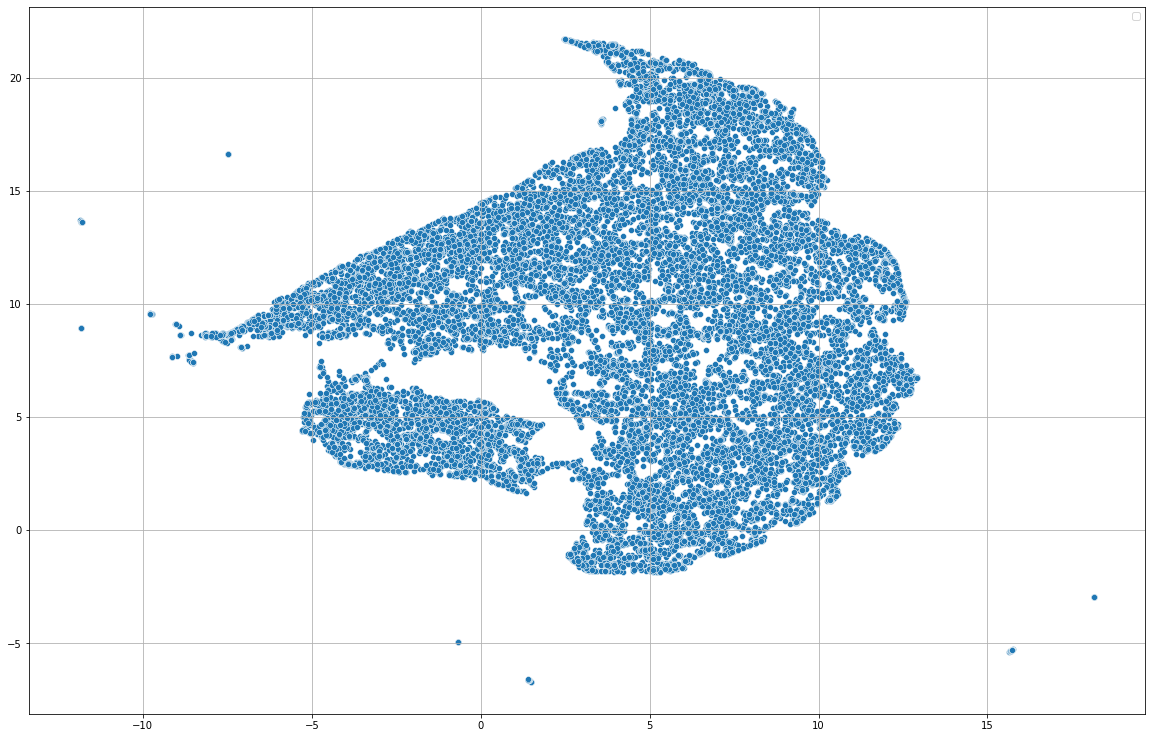

In [61]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1])#c = [sns.color_palette()[x] for x in sample["cargo"].map({value:idx for value, idx in zip(sample['cargo'].unique(), range(len(sample['cargo'].unique())))})], edgecolor='none', ax=ax)
ax.legend()
ax.grid()

In [62]:
var_explained = svd_model.explained_variance_ratio_.sum()
var_explained

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.010349009932839248

In [64]:
svd_model.components_.shape

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3, 39382)

In [65]:
X_topics.shape

/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(23200, 3)